## COMP5721M: Programming for Data Science 

## Coursework 3: Data Analysis Project


# Tesla Stock Closing Price Prediction Based on Time Series


* Zhiping Xiang, sc21xz@leeds.ac.uk
* Zhixin Li, ml21zl3@leeds.ac.uk
* Qingqiao Xiang, sc19qx@leeds.ac.uk
* Mujin Li, sc20ml2@leeds.ac.uk

# Project Plan

## The Data


The fundamental and first procedure of data analysis is to fetch the trustworthy, factual, and quantifiable data. Regarding this investigation, it extracted the dataset from Kaggle and selected the market value of the stock of Tesla during its IPO(Initial Public Offerings) of the last 12 years. However, considering that the data at the beginning of its IPO was unstable and unrepresentative, in conclusion, it finally chose the dataset of the share price change of Tesla within five years as the study subject. The dataset is available at: https://www.kaggle.com/datasets/surajjha101/tesla-share-price-for-last-5-years.  

The selected dataset was saved in the same directory as the current file to facilitate the subsequent data processing, and it comprises a range of variables associated with the share price of Tesla, which includes the opening share price of the day, the closing share price of the day, the lowest share price of the day, the highest share price of the day, the volume of the day, the date, etc. The details are in Table below.  

There are plenty of extensive pieces of research worth to be explored in the analysis and prediction of the stock data, though it was also suggested that it is unachievable to calculate the stock market situation as it involves the combination of complex elements, e.g., the reality factor and human factor. To be specific, the competition among similar products of the same kind of corporation, the covid, and major upgrades and alterations in the corporation, all will have an impact on the further development of the stock. Consequently, we will process the existing open stock information, visualise the data and figure out the linkage between the data variables based on the factors that are balanced. 

|Variable Name|Variable Content|Variable Type|
|-------|-------|-------|
|Date|Date when market was open| Date|
|Open|Stock prices at the opening of the market|dollar($)|
|High|The highest price of the stock of the day|dollar|
|Low|The lowest price of the stock of the day|dollar|
|Close|Stock prices at the closing of the market|dollar|
|Adj Close|Adjusted closing price taking into account a number of factors|dollar|
|Volume|Tradng volumn of the day|share|

###  Some general infromation of dataset
We use some function in pandas package to get details about dataset.

#### View the first 5 rows of dataset.

In [1]:
# Read the data files
import pandas as pd
file_name = 'Tesla-dataset.csv'
df = pd.read_csv(file_name)
# list the top five rows of dataset
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


####  View data format and and count information.

In [2]:
# Check the data format
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2967 entries, 0 to 2966
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2967 non-null   object 
 1   Open       2967 non-null   float64
 2   High       2967 non-null   float64
 3   Low        2967 non-null   float64
 4   Close      2967 non-null   float64
 5   Adj Close  2967 non-null   float64
 6   Volume     2967 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 162.4+ KB


Total of 2967 pieces of data were detected. 

#### Using 'describe' function in pandas to detail math information of datas, like the range.

In [3]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000,2.967000e+03
mean,142.168589,145.308378,138.827751,142.232714,142.232714,3.128686e+07
std,256.017493,261.898733,249.638570,256.070663,256.070663,2.793747e+07
min,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,19.899999,20.576999,19.523000,20.035000,20.035000,1.315400e+07
50%,46.830002,47.543999,45.858002,46.678001,46.678001,2.488110e+07
75%,68.357997,69.459000,67.100998,68.293000,68.293000,3.969725e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,3.046940e+08


#### View the date range

In [4]:
# Print the date range
print('The date start from ', df['Date'].max(),' to ',df['Date'].min())

The date start from  2022-04-08  to  2010-06-29


We also tested and found that the accuracy of the data is very high, which will be discussed in Project Code: Objectives 1 Data Preprocessing: 1.1 Data Quality Analysis

## Project Aim and Objectives 
### Aim
According to the Tesla’s stock data from the kaggle website, we decided to use the dataset to simulated the change of  this stock fluctuation. It can be detected that the dataset is not exist noise compared to the before based on simple data cleaning and sorting, we can use line charts, scatter plots, and box plots to mine each variable data, observe the relationship between the opening price, the highest price, the lowest price and closing price of the day respectively and the date ，and after that we can use the heat map and Pearson coefficient to further search for possible correlations between the various data, observe the relationship between trading volume and closing price via a scatter chart. On this basis, after normalising the data， we generalise the statistical distribution of the uniform sample. Therefore,  k-Nearest neighbours(KNN) model, the linear regression model and the long short-term memory (LSTM)model are used to further simulate the process of stock price changes, and then make graphs for each model, use root mean square error (RMSE) to score these three prediction models respectively, after that we can select the appropriate model, therefore cross-validate the model and then the loss function is analysed for the model to finally determine the prediction function.

### Objectives

* Data Pre-processing
     * Data Quality Analysis 
         * Missing value checking
         * Off-day Value checking
     * Data Filter
         * Considering The relationship between date and data columns about price
         * The relationship between Volume and Date
* Correlation Study between each variable with visualisation 
    * Correlation Analysis
    * Further Exploration the Relationship between Volume and Close Price
        *  Exploration the relationship via a scatter chart
         * Exploration the relationship via a box plot to analysis outliers of the Volume
* Predictive Model Building: K-Nearest Neighbor, Linear regression and LSTM
     * K-Nearest Neighbor model
         * Model Building
         * Data Preparation
     * Linear regression Model
         * Model Building
         * Data Preparation
     * Long Short-term Memory
         * Model Building
             * Set Model Parameters
             * Set the Optimizer and the Loss Function
         * Data Preparation
         * Train LSTM Model
      * Model Evaluation
         * Evaluation for KNN and Linear Regression
         * Evaluation for LSTM


## System Design

### Architecture
The architecture of this project is as follows:
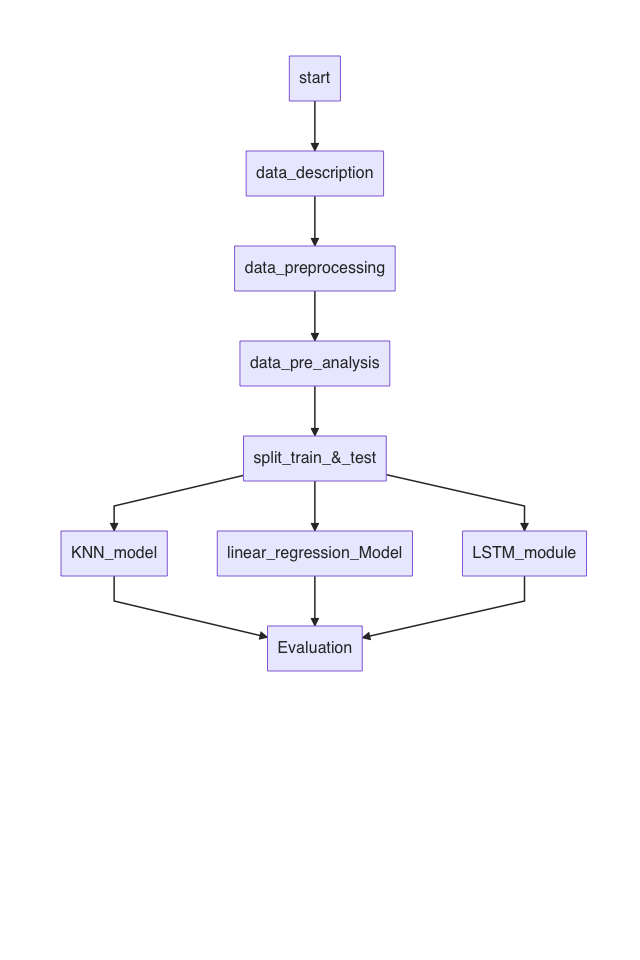
### Processing Modules and Algorithms
* We began with importing the dataset and do the visualision with the matplotlib package to assist in adjusting the boundaries of our data.
* Then we obversed the intersection amongst data:
    *  The adjusted range data is examined by means of line plots, scatter plots and box plots from the matplotlib package in order to visualise and compare the associations between the variables.
    * The corr in pandas was then deployed to analyse the relationships within the data by using Pearson correlation coefficients, and a heat map presentation was made using seaborn to identify the characteristic data.
* Then we used three models for predictive analysis:
    * Model building first, we use Sklenar to build the KNN model, Linear regression Model.
    * Then use torch to build the LSTM model, build a model with two layers of LSTM and one layer of Readout, and set the forward function, but due to it is a regression problem, the activation function is not set. Mwanwhile, we create the optimizer using Adam's one and also create the loss function considering the MSE.
    * And then we do some data processing before train the modules.
        * For KNN and Linear regression, due to the relationship between Date and close         price considered, we use Sklenar to pre-process the data and use fastai to extract time features. he trains set and test set are divided base on this fundamental.
        * For the LSTM model, we perform normalisation processing and assign each data sequence feature set and target set based on the feature data obtained from the previous analysis. And tidy up the dataset using NumPy. After that, we divide the training set and test set.
    * Use the three trained models to make predictions based on the test set.
* FInally,evaluate the models:
    * Because RMSE can better measure the deviation between the predicted value and the real    value, and is more sensitive to anomalous in the data, therefore we use RMSE as the evaluation standard and use matplotlib to draw a graph which can be shown the difference between the predicted value and the calibration value.
    *  For the LSTM model, record the value of loss value, and draw a graph to observe its        convergence in each iteration. Finally, the loss value of the best model is compared with the of the prediction set to ensure that there is no over-fitting or under-fitting state. And use matplotlib to plot the difference between the predicted value and the verified value.

# Program Code 


## Objective 1  Data Pre-processing

### 1.1 Data Quality Analysis 
After observing all the type and information about the dataset, We should also testing the quality of data to pre-processed it. 

There are two aspects to consider:
* Checking whether the missing value exists in the database. 
* Checking whether the off day value exists in the database.

#### 1.1.1 Missing value checking

In [5]:
import numpy as np
print('number of NaN in dataset ：\n',np.sum(df.isnull()))

number of NaN in dataset ：
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


We found that there is no null data in the dataset.

#### 1.1.2 Off-day Value checking

Due to the stock exchange opening on the weekday, data in holiday and weekends should not appear here.

In [6]:
# Process the date format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
# Detect whether off day value exists
# Filter the weekday value
df['Date_working'] = df['Date'].dt.to_period('B')
# comparison
if len(df['Date_working'].unique()) == len(df['Date'].unique()):
    print('The off day value do not exist in the database')

The off day value do not exist in the database


In order to facilitate data comparison, we added a column of temporary data. Remove it from the dataframe.

In [7]:
# delete the test data
#delete the column named 'Date_working'
# overwrites the original array.
df.drop('Date_working', axis=1, inplace=True) 

### 1.2 Data Filter

Before determining the target, we can understand the data through visual methods, considering whether data filter is needed.  
As the most importent factor we are considering in this project is the date, we start explore date from considering the relationship between exchange date and data columns about prices.
#### 1.2.1 The relationship between date and data columns about prices

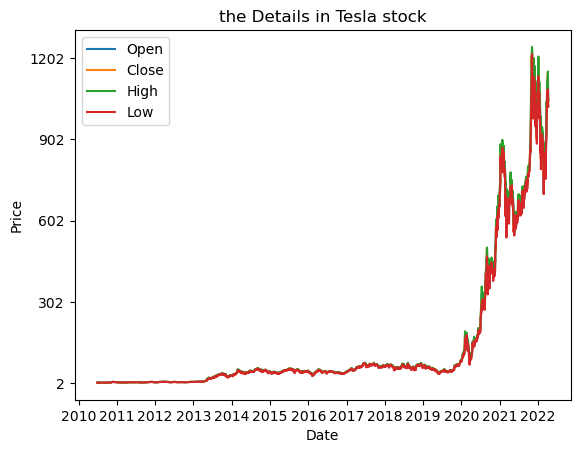

In [8]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def prices_date():
    plt.title(label='the Details in Tesla stock', loc='center')
    plt.xlabel('Date')
    plt.ylabel('Price')
    # Set each axis of the image
    ax = plt.gca() 
    # The date format of the label display for x
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  
    # Take the year as the location
    ax.xaxis.set_major_locator(mdates.YearLocator())
    plt.yticks(range(2, 1300, 300))
    # add data
    x = pd.to_datetime(df['Date'])
    plt.plot( x ,df['Open'], label='Open')
    plt.plot( x ,df['Close'], label='Close')
    plt.plot( x ,df['High'], label='High')
    plt.plot( x ,df['Low'], label='Low')
    plt.legend(loc='best')
    plt.show()
prices_date()

We noticed the price datas have grown dramatically from 2020 to the present. The dataset provider explained it as “the stock price was impacted in the wake of COVID Pandemic (which came at significant level around 1st week of Mar 2020 onwards)”. As the meanwhile, there are some views about that electric vehicles are starting to be getting approvals from the public which is due to Tesla started to significantly strengthen the industrial chain in 2020. Therefore, Tesla started to engage in several other industries and had success, which gave the market full faith in Tesla. Due to it involves the combination of complex elements (e.g., Covid, the competition and major upgrades and alterations in the corporation), these practical factors have impact on our data processing and difficult to quantify. 

Therefore, we decide to filter the data range to reduce the influence on the model. 

In [9]:
# Filtering data that post-2020
df=df[df['Date'] >= '2020-01-01'].copy()

#### 1.2.2 The relationship between Volume and Date

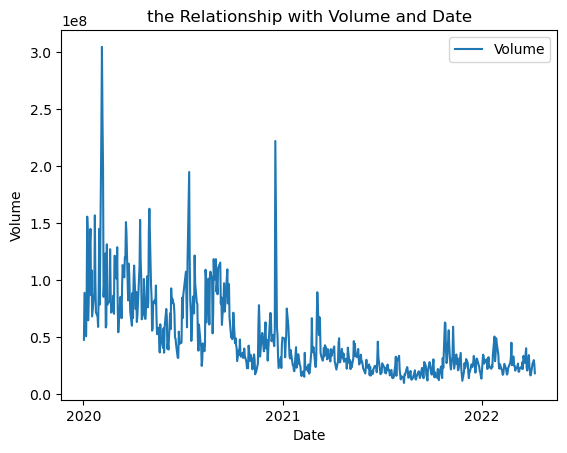

In [10]:
def volume_Date():
    plt.title(label='the Relationship with Volume and Date', loc='center')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    ax = plt.gca()
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.xaxis.set_major_locator(mdates.YearLocator())
    plt.plot(df['Date'], df['Volume'], label='Volume')  
    plt.legend(loc='best')
    plt.show()
    
volume_Date()

Even though volume fluctuates violently at certain moments over time, overall it still exhibits a certain linear relationship with time. Specifically we will discuss in objective2.

However, Before that we need to re-adjust the format of the data which be adjusted before and rebuild the dataframe. Then, we reset the index of the data to To facilitate our processing next.


In [11]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.reset_index(inplace=True)
# set the ‘date’ value as the column index of dataset
df.index = df['Date']
df.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,,
2020-01-02,2394,2020-01-02,84.900002,86.139999,84.342003,86.052002,86.052002,47660500
2020-01-03,2395,2020-01-03,88.099998,90.800003,87.384003,88.601997,88.601997,88892500
2020-01-06,2396,2020-01-06,88.094002,90.311996,88.000000,90.307999,90.307999,50665000
2020-01-07,2397,2020-01-07,92.279999,94.325996,90.671997,93.811996,93.811996,89410500
2020-01-08,2398,2020-01-08,94.739998,99.697998,93.646004,98.428001,98.428001,155721500


We can find  there is an extra column called index, which does not need to be considered in this project, wo we drop it.

In [12]:
df.drop('index', axis=1, inplace=True)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2020-01-02,2020-01-02,84.900002,86.139999,84.342003,86.052002,86.052002,47660500
2020-01-03,2020-01-03,88.099998,90.800003,87.384003,88.601997,88.601997,88892500
2020-01-06,2020-01-06,88.094002,90.311996,88.000000,90.307999,90.307999,50665000
2020-01-07,2020-01-07,92.279999,94.325996,90.671997,93.811996,93.811996,89410500
2020-01-08,2020-01-08,94.739998,99.697998,93.646004,98.428001,98.428001,155721500


## Objective 2    Correlation Study between each variable with visualisation

In order to facilitate subsequent work such as stock forecasting, it was necessary to visualise the interaction of several variables by graphing them. Among all the data, the most significant aspect to which one ought to devote attention is the relationship between the various variables and the closing price.

### 2.1 Correlation Analysis
Since all variables are essentially continuous, the Pearson correlation coefficient was utilised efficiently to analyse the inter-relationships between the data. 
 
Here we used corr() function in Pandas package.

In [13]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999066,0.998710,0.997425,0.997425,-0.644392
High,0.999066,1.000000,0.998626,0.998862,0.998862,-0.634734
Low,0.998710,0.998626,1.000000,0.998862,0.998862,-0.654669
Close,0.997425,0.998862,0.998862,1.000000,1.000000,-0.642535
Adj Close,0.997425,0.998862,0.998862,1.000000,1.000000,-0.642535
Volume,-0.644392,-0.634734,-0.654669,-0.642535,-0.642535,1.000000


A heatmap display considerring the correlation, which help us to  observe the relationship between variables better.

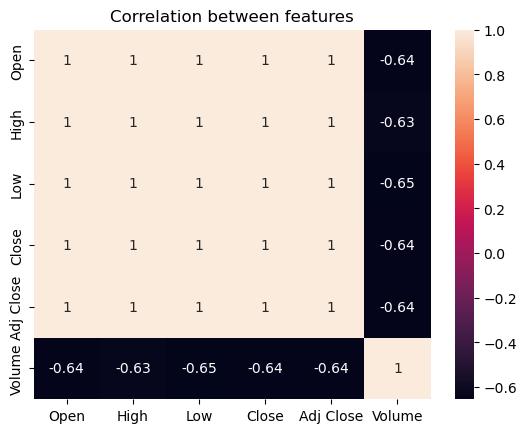

In [14]:
# The correlation analysis
import seaborn as sns
def correlation():
    plt.title(label='Correlation between features', loc='center')
    sns.heatmap(df.corr(), annot=True)
    plt.show()
correlation()

It is obvious from the heat map that the absolute value of the linear correlation coefficient between trading volume and all other variables is between 0.5 and 0.8, hence it can be assumed that there is a very robust linear relationship among the variables that change in share price over the course of a day. 

And for the two variables (volumn and close price) whose correlation is not high as others, we can explore the relationship by further plotting.

### 2.2 Further Exploration the Relationship between Volumn and Close Price

#### 2.2.1 Exploration the  relationship via a scatter chart

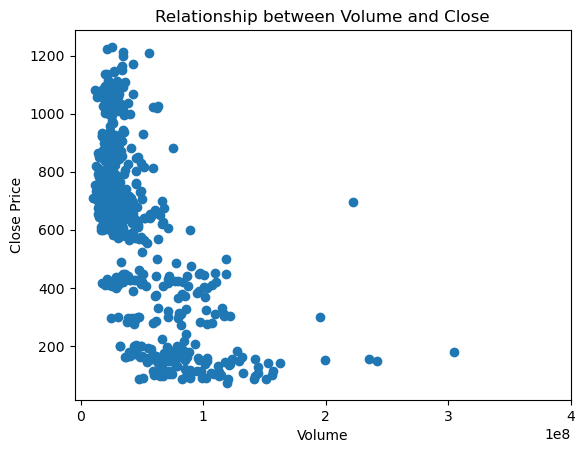

In [15]:
def volumn_price_scatter():
    plt.title(label='Relationship between Volume and Close', loc='center')
    plt.scatter(df['Volume'], df['Close'])
    # To create a reasonable xticks
    plt.xticks(range(0, 500000000, 100000000))
    plt.xlabel('Volume')
    plt.ylabel('Close Price')
    plt.show()
volumn_price_scatter()

#### 2.2.2 Exploration the  relationship via a box plot to analyse outliers of the Volume

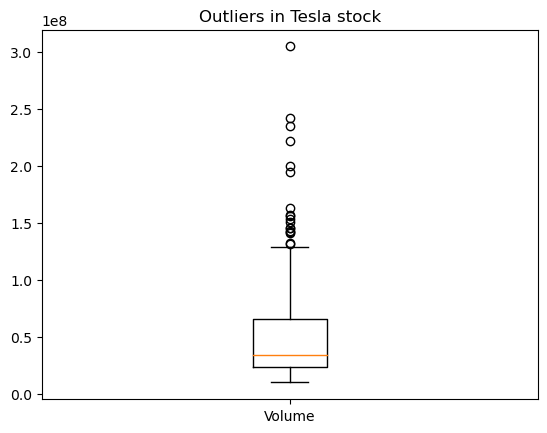

In [16]:
# To analyse outliers by drawing a box plot
def box_plot():
    plt.title(label='Outliers in Tesla stock', loc='center')
    plt.boxplot(df['Volume'], labels=['Volume'])
    plt.show()
box_plot()

We found the graph has more outliers which is concentrated on the upper side of box, which indicate the data distribution is right skewed and that the data is skewed and does not satisfy a normal distribution. 

## Objective 3 Predictive Model Building:  K-Nearest Neighbor, Linear regression and LSTM

After adjusting the range of the data, we found a correlation between closing price and time, as well as closing price and all other variables. Therefore, we can predict the future stock price of Tesla stock by studying the trend of close price.

Here we use the KNN model, and linear regression to predict the closing price based on its relationship with date. 

Finally, we use LSTM to make predictions considerring all the related factors. 

### 3.1 K-Nearest Neighbor model 

#### 3.1.1 Model Building
To build the KNN model, we need to normalize the input eigenvalues to summarize the statistical distribution of uniform samples. At the same time, we also need to call the KNN model in the scikit-learn library and set the parameters.

Then find the optimal number of nearest neighbors using the train data to train the model. Finally, predict the test set and output the result.


In [17]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
def knn_model(x_train, y_train, x_test):  
    #Normalization of the variables to be trained subsequently.
    scaler = MinMaxScaler(feature_range=(0, 1))
    # Scale data
    x_train = pd.DataFrame(scaler.fit_transform(x_train))
    x_test = pd.DataFrame(scaler.fit_transform(x_test))
    
    # Find the best parameter by grid search
    params = {'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}
    # call the knn model
    knn = neighbors.KNeighborsRegressor()
    #to find K Neighbors with Greedy Search
    # and set the parameters for cross-validation to 5。
    model = GridSearchCV(knn, params, cv=5)
    #train model
    model.fit(x_train, y_train)
    #Print the optimum neighbors
    print("best parameters: ", model.best_params_)
    
    # Predict test data
    preds = model.predict(x_test)
    return preds

#### 3.1.2 Data Preparation

We need to take the corresponding columns which includes columns "Data" and "Close" out of the original dataset. It is considered that the independent variable in this situation is Date. Therefore, we separate the training set and test set, analyse the time data using the fastai package, extract the necessary time characteristics from this column, including day, month, year, mon/fri, etc., and then split the training set, test set, and use the KNN algorithm for prediction. 

In [18]:
from fastai.tabular.all import add_datepart
def data_preparation(df):
    # Creat a dataframe for taking part in a prediction
    standardized_data = pd.DataFrame(index=range(0, len(df)), columns=['Date', 'Close'])
    #  Extract the columns 'Date' and 'Close' from the original dataset 
    # save them into a new dataframe
    for i in range(0, len(df)):
        standardized_data['Date'][i] = df['Date'][i]
        standardized_data['Close'][i] = df['Close'][i]
    new_data= pd.DataFrame(index=range(0, len(df)), columns=['Date', 'Close'])
    new_data['Date']=df['Date']
    
    # Add all the features of ‘date’ and list the features
    add_datepart(standardized_data, 'Date')
    print("features of date have added successfully!\nThey are listed below:")
    
    # Print and check the set of features contained in standardized_data.
    print(standardized_data.columns)
    # Drop ‘Elapsed’, which is the data type ‘Timestamp’ 
    # which can not used by model
    standardized_data.drop('Elapsed', axis=1, inplace=True)

    # The first 80% of the dataset was selected as the train set, 
    # the last 20% as the test set 
    # and the ‘Close’ and ‘Price’ value was retained to validate the model
    split_point = int(len(standardized_data) * 0.8)
    train = standardized_data[:split_point]
    test = standardized_data[split_point:]
    train_x = train.drop('Close', axis=1)
    train_y = train['Close']
    test_x = test.drop('Close', axis=1)
    test_y = test['Close']
    print("Get train set, test set successfully!")
    return train_x, train_y, test_x, test_y

/Users/xiangzhiping/opt/anaconda3/envs/study/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using add_datepart can extract many detailed time features from Date, which will be displayed in the result section, which can be used as features to predict close price.

After data preparation and model building, we cold use the model to do prediction.

### 3.2 Linear regression Model

#### 3.2.1 Model Building

The data does not need to be normalised for this stage. Utilize the scikit-learn library's linear regression model to train and forecast the closing price in the test set. 

In [19]:
from sklearn.linear_model import LinearRegression

def linear_model(x_train, y_train, x_test):
    #Import a linear regression model
    model = LinearRegression()
    # Call the train set to train the model
    model.fit(x_train, y_train)
    # use the model to make prediction
    preds = model.predict(x_test)
    return preds

#### 3.1.2 Data Preparation
This stage is same as the one in KNN model.

### 3.3 Long Short-term Memory
The LSTM algorithm is widely used in sequence prediction problems, it can store important past information and ignore unimportant information. In the variable study in the previous part, we can see that there is a strong correlation between all variables and the closing price. Therefore, in this model, we will consider all variables as data features into the model thinking. Since we have modified the index of the dataframe to time, the data is arranged in chronological order, and there is no need to do more cleaning and filtering operations on the original data. 

#### 3.3.1 Model Building
Use the LSTM model in pytorch package to build a two layers LSTM with a full connected layer and set the forward method. 

In [20]:
import torch.nn as nn

class LSTM(nn.Module):
    def __init__(self, _input_dim, _hidden_dim, _hidden_layer, _output_dim):
        super(LSTM, self).__init__()
        self.input_dim = _input_dim
        self.hidden_dim = _hidden_dim
        self.num_layers = _hidden_layer
        
        # Build LSTM
        # batch_first=True causes input/output tensors to be of shape (batch_dim, seq_dim, feature_dim)
        self.lstm = nn.LSTM(_input_dim, _hidden_dim, _hidden_layer, batch_first=True)
        # Add a full connected layer
        self.fc = nn.Linear(_hidden_dim, _output_dim)

    def forward(self, x):
        # Initialize hidden state，with batch_size =x.size(0),
        # and set the gradient rotation
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        # Initialize cell state
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
       
        # Set Detach to avoid propagating back through the whole training history
        h0 = h0.detach()
        c0 = c0.detach()
        # One time step
        out, (hn, cn) = self.lstm(x, (h0, c0))
        out = self.fc(out)
        return out


#### 3.3.1.1 Set Model Parameters:
Here are 4 parameters considerring in our LSTM model:
* input_dim: The dimension of the input, here is 6, because there are 6 features considering. They are open price, close price, high price, low price, adj close price and Volumn.
* hidden_dim: Hidden dimension, same as hidden_size, here we set it to 32 
* hidden_layer: same as the number of layer,which indicate the number of hidden layers of LSTM 
* output_dim: The dimension of the output, which is the close price, so it is 1. 
* epoch_num: number of iterations, using when train LSTM model
 Then we pass it into the model.

In [21]:
input_dim = 6
hidden_dim = 32
hidden_layer = 2
output_dim = 1
epoch_num= 100
# build LSTM model
model_LSTM = LSTM(_input_dim=input_dim, _hidden_dim=hidden_dim, _output_dim=output_dim, _hidden_layer=hidden_layer)

#### 3.3.1.2 Set the Optimizer and the Loss Function:
We also need to determine the optimizer and loss function before starting to train the model in the finally step. Here we use Adam optimizer and MSE loss function. 

* Adam combines the advantages of RMSProp and AdaGrad, and its performance is even better 

* Set MSE as Loss function. It can also converge effectively when using a fixed learning rate. The gradient of the MSE loss increases as the loss increases, and decreases as the loss approaches 0. So at the end of training, the results using the MSE model will be more accurate.

In [22]:
import torch
# Create the optimizer by Adam
optimiser = torch.optim.Adam(model_LSTM.parameters(), lr=0.01)
# Create the loss function by MSE
loss_fn = torch.nn.MSELoss(reduction='mean')

#### 3.3.2 Data Preparation 
Considering that many data features need to work together, we first need to perform Normalization operations on each feature data. Here we still choose data normalization. 

After that, labeled the data, and the closing price of the next day is used as the label of the current day, and then we do the data clean. Because there is a situation where there is no target in the last digit. 

Create the feature set and target set according to the data interface of the model. 

Then, split the training set and test set.
Considering that many data features need to work together,the normalization operations on each feature data is needed. After that, the data should label with target, which using the closing price of the next day. And anather data cleaning is needed as there is a situation where there is no target in the last digit. 

Finally, we could create the feature set and target set according to the data interface of the model. Finally, split the training set and test set.

In [23]:
import torch

def lstm_data_preparation(df):
    # Select the following columns of dataset as features    
    sel_col = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
    df_LSTM = df[sel_col]
    # Normalisation for each columns
    scaler = MinMaxScaler(feature_range=(0, 1))
    # the shape value of the selected data column can be adjusted by using the np.reshape()  
    #and then stored in the original column.
    for col in sel_col:
        max_min_scaler = scaler.fit_transform(df_LSTM[col].values.reshape(-1, 1))
        df_LSTM = df_LSTM.drop(col, axis=1)
        df_LSTM[col] = max_min_scaler
    print('first 5 row of data after normalisation:\n',df_LSTM.head())
    # Use the next ‘close price' as today's 'target'
    # shift by 1
    df_LSTM['target'] = df_LSTM['Close'].shift(-1)
    print('the last target value after target:  ',df_LSTM['target'][-1])
    # the data in the last row have no target value,Drop the row
    df_LSTM.dropna()
    
    # Create the feature set and target set
    data_features, data_targets = [], []
    #Make each data series have 10 sets of data
    seq = 10
    
    for index in range(len(df_LSTM) - seq):
        data_features.append(
            df_LSTM[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']][index: index + seq].values)
        data_targets.append(df_LSTM['target'][index:index + seq])
    # Convert feature set and target set into np.array
    data_features = np.array(data_features)
    data_targets = np.array(data_targets)
    
    # Split the data into train and test according to the ratio
    # The purpose of the code here is to divide 80% of the data into a train set and the remaining 20% into a test set.
    ratio = 0.2
    test_set_size = int(np.round(ratio * df_LSTM.shape[0]))
    train_size = data_features.shape[0] - test_set_size
    # The reshape() adjusts the shape value of the selected column to ‘seq’and the vector to 6( number of features)
    #and then transform the result into type(torch.Tensor)    
    train_x = torch.from_numpy(data_features[:train_size].reshape(-1, seq, 6)).type(torch.Tensor)
    test_x = torch.from_numpy(data_features[train_size:].reshape(-1, seq, 6)).type(torch.Tensor)
    train_y = torch.from_numpy(data_targets[:train_size].reshape(-1, seq, 1)).type(torch.Tensor)
    test_y = torch.from_numpy(data_targets[train_size:].reshape(-1, seq, 1)).type(torch.Tensor)
    
    return train_x, train_y, test_x, test_y

#### 3.3.3 Train LSTM model
Use the training set to train the model, and set the number of iterations epoch_num to 200. Save the loss value for the next verification.

In [24]:
def LSTM_model_train(epoch_num,train_x,train_y):
    # Train model
    loss_mse = np.zeros(epoch_num)
    for t in range(epoch_num):
        preds = model_LSTM.forward(train_x)
        loss = loss_fn(preds, train_y)
        # Zero out gradient, else they will accumulate between epochs
        optimiser.zero_grad()
        # Backward pass
        loss.backward()
        # Update parameters
        optimiser.step()
        
        if t % 10 == 0 and t != 0:
             print("Epoch ", t, "MSE on Train set: ", loss.item())
        loss_mse[t] = loss.item()

    preds = model_LSTM.forward(train_x)
    print("Final loss(MSE): ", loss_fn(preds, train_y).item())
    return loss_mse

## Objective 4  Model Evaluation
### 4.1 Evaluation for KNN and linear regression

In this project, we use RMSE to measure the deviation between the predicted value and the real value, because RMSE is more sensitive to outliers in the data, and it is more intuitive to use it to test the gap between the predicted value and the real value. Then draw a graph to compare the predicted results with the actual values.

In [25]:
def evaluation(test_y, preds):
    # calculate RMSE
    rmse = np.sqrt(np.mean(np.power((np.array(test_y) - np.array(preds)), 2)))
    
    # Plotting to visualise the gap between the actual value and the predicted value
    plt.plot(test_y, label='Actual Data')
    plt.plot(test_y.index, preds, label='Predicted Data')
    plt.title(label='Comparison between Actual and Predicted Data ', loc='center')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend(loc='best')
    plt.show()
    return rmse

### 4.2 Evaluation for LSTM
When using the training set to train the model, we found that the MSE will gradually decrease as the model is optimized. Therefore, we can make a loss function graph to specifically observe the convergence trend of the model during training.

In [26]:
# draw the line chart of the value of loss under different Epoches.
def loss_fn_graph(epoch_num,loss_mse):
    epoch=np.arange(0,epoch_num)
    plt.plot(epoch,loss_mse, label='loss(MSE)')
    plt.title(label='Loss Function under Epoches', loc='center')
    plt.xlabel('epoch')
    plt.ylabel('loss(MSE)')
    plt.show()

Draw a graph to show the actual value and the predicted value, and observe the gap.

In [27]:
def preds_true(preds,test_y):
    pred_value = preds.detach().numpy()[:, -1, 0]
    true_value = test_y.detach().numpy()[:, -1, 0]

    plt.plot(pred_value, label="Preds data")
    plt.plot(true_value, label="Actual Data")

    plt.title(label='Comparison between Actual and Predicted Data ', loc='center')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend(loc='best')
    plt.show()

# Project Outcome

## Overview of Results
* The data quality is very high.Through explore the detailsdata cleaning, we found that the data has no null values and duplicate values and do not need further clean.


* There is a strong linear relationship among the variables.After making line charts, scatterplots, and heatmaps using specifical variables. And according to the Pearson coefficient, it can be judged that there is a strong relationship between the variables.
* Through the line chart, we can find that the stock trading volume is inversely proportional to time, and as the year grows, the trading volume decreases. The price of a stock is directly proportional to time, and as the year progresses, the price of the stock increases. From this, we can speculate that as the years go by, the stock is gradually concentrated in the hands of major shareholders, or it has not been sold because shareholders have high expectations for it.
* According to the RMSE (root mean square error) between the predicted value of the KNN (k-nearest neighbors algorithm) model and the linear regression model and the real value, and the comparison of the line chart between the predicted data and the original data, it can be clearly seen that the RMSE values of both are too high. Therefore, it can be concluded that the two models have large errors and are not suitable for predicting Tesla stock price data.

* LSTM can predict the ups and downs of stocks very well, but there is still a certain delay in time.

### Objective 1  Data Pre-processing
#### 1.1 Data Quality Analysis 
As there isn't any null value and noisy data in the dataset according to the programming, it indicates the quality of this data set is very high. So that data analysis can be performed with simple filtering.

#### 1.2 Data Filter
Considerring the realistic factors mentioned before, we decided to filter the data range to Jan. 1st 2020 to the end.
And the final data used into analysis shows here.
##### 1.2.1 The Relationship between date and data columns about prices

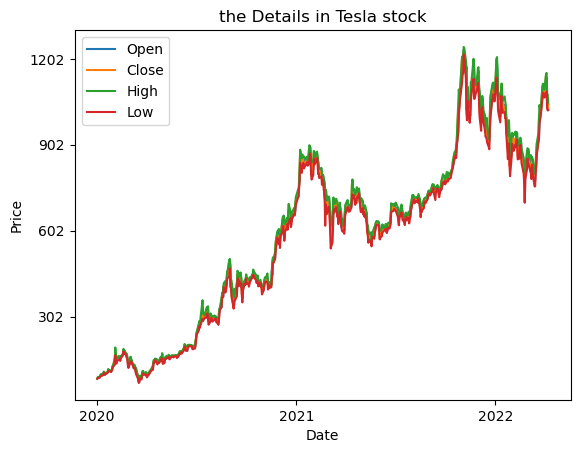

In [28]:
prices_date()

From the diagram, it is apparent that with the accumulation of time, the line plots of each variable of opening price, the highest price, the lowest price and closing price of the day all broadly exhibit an upward trend, and the rise is proportional to the increase in time. 

##### 1.2.1 The relationship between Volume and Date

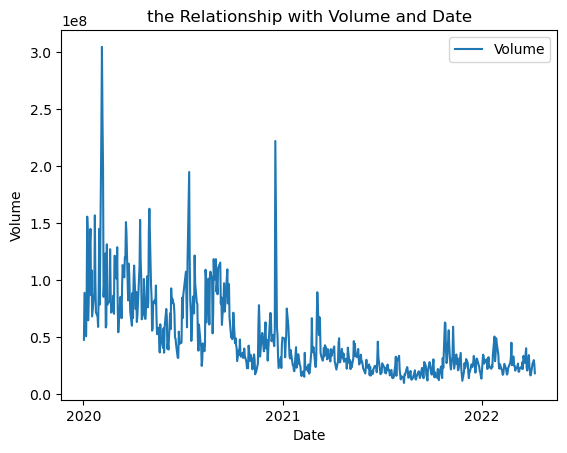

In [29]:
volume_Date()

As can be noticed throughout the illustration, the trading volume is essentially linear with date, with a slight downward trend as time goes by, and is roughly inversely proportional to the growth of time, which is a lateral indication that stocks are becoming more concentrated in the hands of stockholders. There are three maxima trading hours, which coincide with the period 2020-2021 when share prices are more volatile.

### Objective 2    Correlation Study between each variable with visualision

#### 2.1 Correlation Analysis

Here we use the heatmap to exhibit the correlation between variables.

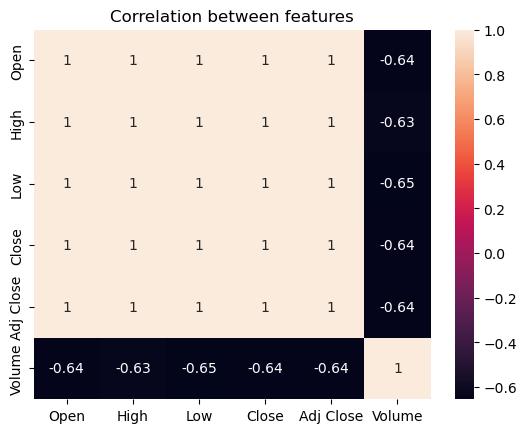

In [30]:
correlation()

We can explore from the heatmap that there are  very strong linear relationships between the variables pairs.

#### 2.2 Further Exploration the Relationship between Volumn and Close Price

##### 2.2.1 Exploration the  relationship via a scatter chart


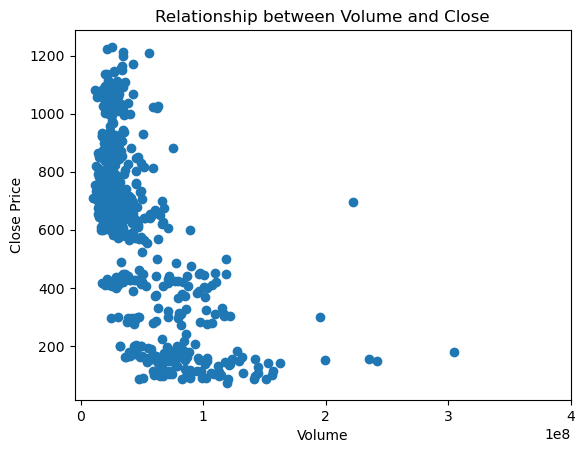

In [31]:
volumn_price_scatter()

On the basis of the scatter plot, it can be concluded that for the majority of the time, the volume prices are concentrated within the band 600 to 1000. Owing to the dispersed volume prices, in this case we use a box plot to examine the data for more exploration. 

##### 2.2.2 Exploration the  relationship via a box plot to analyse outliers of the Volume


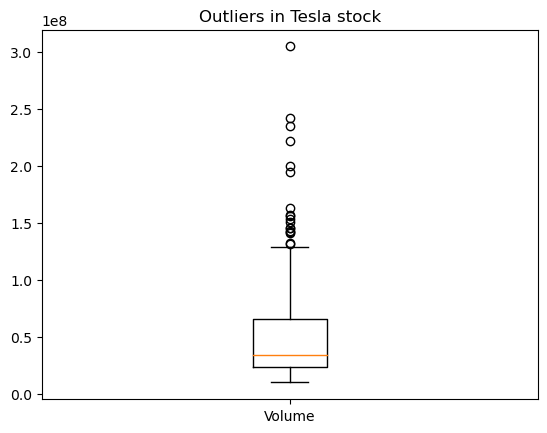

In [32]:
box_plot()

The graph demonstrates that the volume is mainly between 0.25*10^8 and 0.6* 10^8, with the upper quartile being approximate 0.6*10 and the lower quartile being approx. 0.3 to 0.4, with the upper edge being 1.4* 10^8 and the lower edge being 1* 10^8. The figure has more outliers and is concentrated on the side of the larger values, indicating that the data distribution is right skewed and that the data is skewed and does not satisfy a normal distribution. 

### Objective 3 Predictive Model Building:  K-Nearest Neighbor, Linear regression and LSTM

#### 3.1 K-Nearest Neighbor model 

* First get the train set and test set

In [33]:
# get train set and test set
train_x, train_y, test_x, test_y = data_preparation(df)

features of date have added successfully!
They are listed below:
Index(['Close', 'Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
       'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start',
       'Is_year_end', 'Is_year_start', 'Elapsed'],
      dtype='object')
Get train set, test set successfully!


We found that Date contains a lot of time features as independent variables. And the first 80% of the data is used as the training set, and the 20% of the data is used as the test set.

* Use KNN model for prediction

In [34]:
# Use KNN model
preds_knn = knn_model(train_x, train_y, test_x)

best parameters:  {'n_neighbors': 13}


In KNN, after trainning, the best neighbor is 13. Using the trained model to predict the close price return the prediction result set, which will be displayed in the evaluation.

#### 3.2 Linear regression Model
Use the same training and test sets as above.

In [35]:
preds_linear = linear_model(train_x, train_y, test_x)

#### 3.3 LSTM
##### 3.3.1 get train set and test set for LSTM

In [36]:
train_x_LSTM, train_y_LSTM, test_x_LSTM, test_y_LSTM=lstm_data_preparation(df)

first 5 row of data after normalisation:
                 Open      High       Low     Close  Adj Close    Volume
Date                                                                   
2020-01-02  0.008590  0.004446  0.012416  0.011927   0.011927  0.128385
2020-01-03  0.011350  0.008454  0.015068  0.014130   0.014130  0.268205
2020-01-06  0.011345  0.008034  0.015606  0.015604   0.015604  0.138573
2020-01-07  0.014955  0.011487  0.017935  0.018631   0.018631  0.269962
2020-01-08  0.017077  0.016108  0.020528  0.022618   0.022618  0.494826
the last target value after target:   nan


##### 3.3.2 train the model
Use the training set to train the model, input iterative data, and retain the loss function, so that we can evaluate the model more convenient.

In [37]:
loss_mse=LSTM_model_train(epoch_num, train_x_LSTM,train_y_LSTM)

Epoch  10 MSE on Train set:  0.03074217215180397
Epoch  20 MSE on Train set:  0.011259130202233791
Epoch  30 MSE on Train set:  0.004496932029724121
Epoch  40 MSE on Train set:  0.0022360507864505053
Epoch  50 MSE on Train set:  0.0015167233068495989
Epoch  60 MSE on Train set:  0.0010124908294528723
Epoch  70 MSE on Train set:  0.0007294955430552363
Epoch  80 MSE on Train set:  0.0005925490986555815
Epoch  90 MSE on Train set:  0.0005119821871630847
Final loss(MSE):  0.0004547341086436063


##### 3.3.3 Use the trained model to make predictions
get the prediction data with Loss value set.

In [38]:
preds_LSTM = model_LSTM(test_x_LSTM)
print("Loss(MSE) on test_x: ", loss_fn(preds_LSTM, test_y_LSTM).item())

Loss(MSE) on test_x:  0.004332250449806452


We found that the Loss value of the prediction result is smaller than the result of training set that we ued, which means that there may exists a slight overfitting , but this situation is within the normal tolerance range. So the result can be accepted. 


## Objective 4  Model Evaluation
### 4.1 Evaluation for KNN 

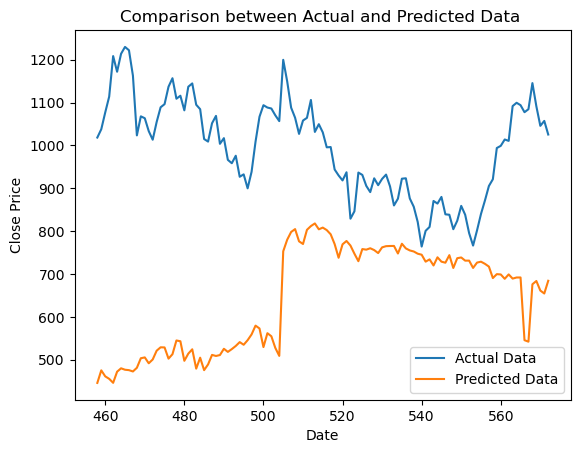

The RMSE of knn module:  407.5938093863241


In [39]:
knn_rmse = evaluation(test_y, preds_knn)
print('The RMSE of knn module: ', knn_rmse)


It can be seen from the figure that the value of RMSE is exceptionally large, which proves that there is a large gap between the forecast value and the actual value. This can be clearly seen in the first half of the figure. But the gap tends to decrease in the second half of the data. But overall, the predictions outcome is not particularly good in total.

So we can comfirm this is due to the main problem of KNN, which is that the model overfits the day and month. The model will consider the value from the same date a month ago or the same date/month a year ago instead of considering previous values from a forecasting perspective. 

### 4.2 Evaluation for linear regression Model 

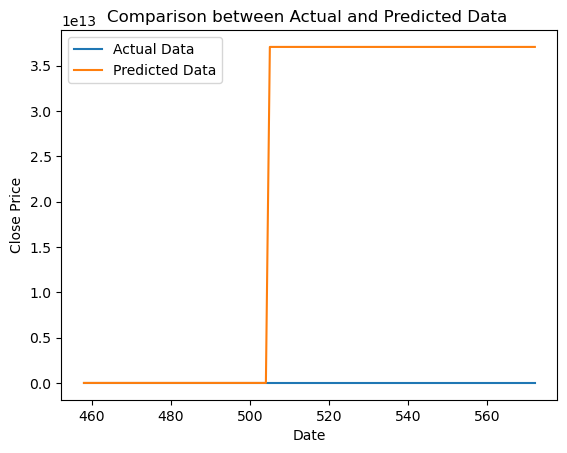

The RMSE of linear regression model:  28502150760474.758


In [40]:
 # Use linear regression Model
linear_rmse = evaluation(test_y, preds_linear)
print('The RMSE of linear regression model: ', linear_rmse)


The RMSE of the linear regression is very huge and unacceptable. Too large difference from the true value occurs. 

So we could comfirm the two basic regression models does not fit the data set. 

### 4.3 Evaluation for LSTM

#### 4.3.1 Make a loss function graph of the LSTM algorithm

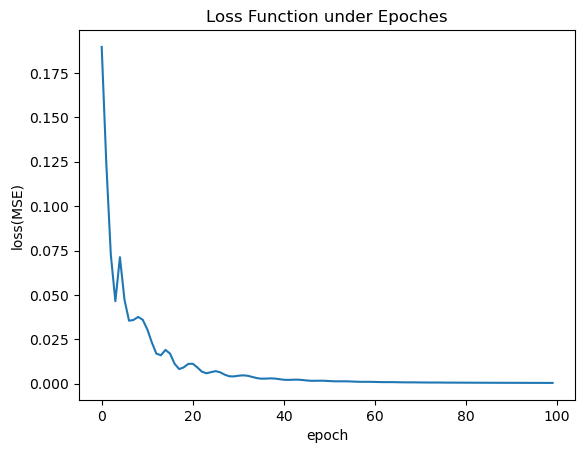

In [41]:
loss_fn_graph(epoch_num,loss_mse)

#### 4.3.2 Plot forecasted data versus actual data 

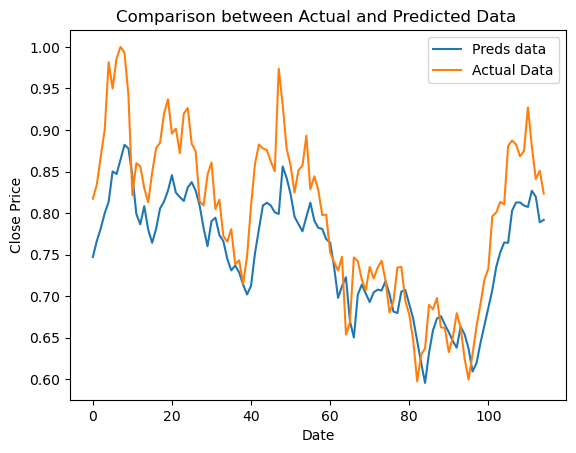

In [42]:
preds_true(preds_LSTM,test_y_LSTM)

To predicted the line trend is basically consistent with the original data, they are both with a slight lag in time. This is because the predicted is according to the predict results that are based on the results of the previous time series, and There is also the possibility of improving. 

# Conclusion


### Achievements
The RMSE values of both regression models are overly large, which confirmed that there was a wide discrepancy between the predicted and actual values. In other word, the outcome of the predictions is not good and this suggests that the regression model does not perform well on this dataset. Therefore, we adopted the sequential prediction model LSTM for prediction and identified the resulting loss MSE values were significantly reduced, which is proof that the model ultimately converged properly and achieved superior prediction results on this dataset. 

### Limitations
 Despite the lstm model presented above predicting a trend that is almost identical to the original data, there is still a lag of 1 to 2 days. As such, improvements can be implemented here in the future to enhance the accuracy of its predictions. Meanwhile, the limitations of the data and a number of difficult to quantify human factors that may influence the stock market, for instance corporate news, amalgamation or spin-off of enterprise etc., which are not foreseen in advance. Hence, our forecasts are made under more desirable circumstances and the accuracy of the predicted data might be jeopardised if there are some additional substantial disturbances from external factors or others. 

### Future Work
During the prediction process of LSTM, we are conscious of a slight overfitting phenomenon within the normal tolerance. Nevertheless, we are convinced that we are capable of tweaking the LSTM parameters, by adjusting forget_bias, batch size, and the time horizon of the stock series, to locate the optimal parameters to produce a more optimised prediction. On this basis, we will consider other dimensions as far as possible to construct a preferable model. 